# Project objective:
To build a model name bigmart for prediction of sales of each article in each store.


# Loading Packages and Data

# Data Structure and Content

In [1]:
#required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt                                    #for plotting the graph
%matplotlib inline
import seaborn as sns                                                   #for plotting the graph

from sklearn.preprocessing import LabelEncoder                          #for one hot encoding 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler                        #scaling the data
from sklearn.linear_model import LinearRegression                       #compilation of linear regression
from sklearn.model_selection import cross_val_score                     #model accuracy/strength of prediction
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  #  random forest regresor,GBR
from sklearn.metrics import mean_squared_error, r2_score                #regression accuracy
from sklearn.linear_model import LinearRegression                       #linear regression
from xgboost import XGBRegressor                                        #XG Boost regressor

In [2]:
train = pd.read_csv('C:/Users/Gilda Dhruv/Downloads/Train.csv') # read train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.copy()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.shape               #matrix size of data before data pre-processing

(8523, 12)

In [5]:
train.describe()        #description of data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.columns[train.isna().any()]              # to find any coloums with no entry

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [7]:
train.isnull().sum()            #to find sum of null values in data in the column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.info()                    #information regardint data type of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.nunique()                    # to find the count of unique article in column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
test = pd.read_csv('C:/Users/Gilda Dhruv/Downloads/Test.csv') # read test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
test.copy()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [12]:
test.shape

(5681, 11)

In [13]:
test.describe()   

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [14]:
test.columns[test.isna().any()]     

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [15]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Categorical Features:

Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

# data cleaning

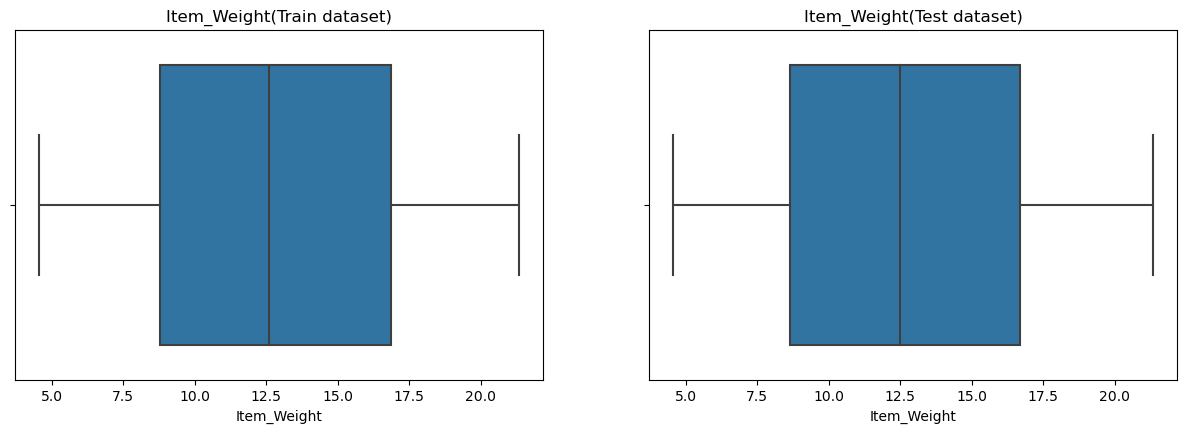

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Item_Weight(Train dataset)')
sns.boxplot(x='Item_Weight', data=train)  #box plot code for detecting the outliers and to find the skewnes in the data

plt.subplot(2,2,2)
plt.title('Item_Weight(Test dataset)')
sns.boxplot(x='Item_Weight', data=test)

plt.show()

As from above graph we can see that there are no outliers in the item_weight of both train and test data set.

as from the box plot we can see that the data is not skewed right or left we can use MEAN value of column as subtitude for 
the missing values.

In [19]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

In [20]:
train.Outlet_Size.unique()            # to find unique observations in column

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [21]:
train.Outlet_Size.value_counts()      # to find count of unique obsevations in column

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
test.Outlet_Size.value_counts()    

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [23]:
test.Outlet_Size.unique()                

array(['Medium', nan, 'Small', 'High'], dtype=object)

as the column is catagorical variable we can replace missing values with MODE of The coloum

In [24]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode()[0])

In [25]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

from above we can see that there is no null values in dataset.

In [27]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [28]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

we need to match the lowercase and uppercase

In [29]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [30]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [32]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [33]:
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [34]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [35]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

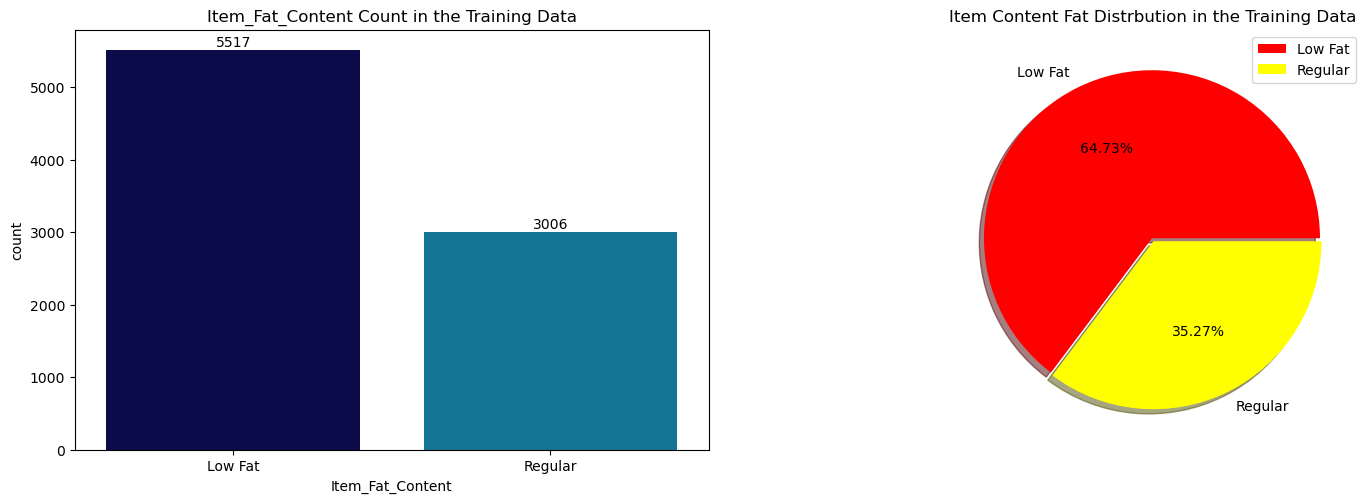

In [36]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Item_Fat_Content Count in the Training Data")
ax=sns.countplot(x='Item_Fat_Content', data=train, palette='ocean')                  # barplot(as countplot )
plt.bar_label(ax.containers[0])                                                      #print the count respectively over the bars


plt.subplot(2,2,2)
low_fat = train.Item_Fat_Content[train.Item_Fat_Content == 'Low Fat'].count()
reg = train.Item_Fat_Content[train.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", colors=['red', 'yellow'], shadow=True)
plt.legend()                                                  #pie plot 

plt.show()

[Text(0, 0, '1232'),
 Text(0, 0, '1200'),
 Text(0, 0, '910'),
 Text(0, 0, '856'),
 Text(0, 0, '682'),
 Text(0, 0, '649'),
 Text(0, 0, '648'),
 Text(0, 0, '520'),
 Text(0, 0, '445'),
 Text(0, 0, '425'),
 Text(0, 0, '251'),
 Text(0, 0, '214'),
 Text(0, 0, '169'),
 Text(0, 0, '148'),
 Text(0, 0, '110'),
 Text(0, 0, '64')]

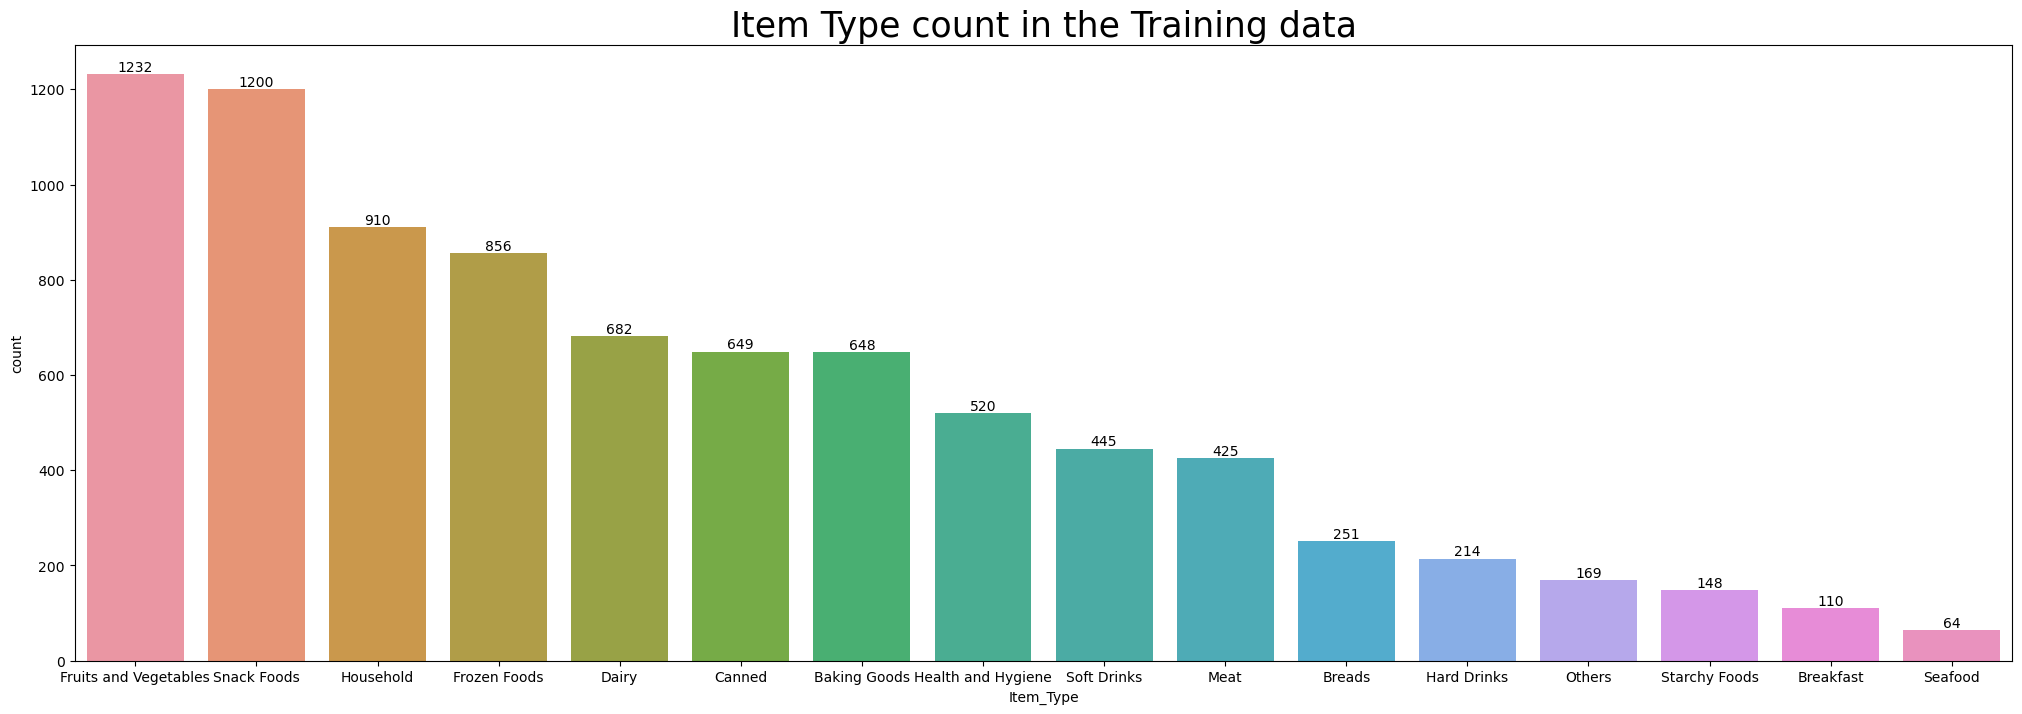

In [37]:
plt.figure(figsize=(25,8))
plt.title("Item Type count in the Training data", {"fontsize" : 25})
order = train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index   #counting according to item type and grouping it, and sorting the values w.r.t item outlet sales
ax=sns.countplot(x='Item_Type', data=train, order=order);
plt.bar_label(ax.containers[0])

interpretation of above bar graph:
    fruits and vegetables are most sold products follwed by snack foods this can be because it is used in daily life.
    seafood is very less sold articles may be due large no. of vegetarian population(this is just a guess) 
    also it would be eaten ooccasionaly.
    breakfast articles are also seen less as many would prefer to make it fresh and eat.

In [38]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

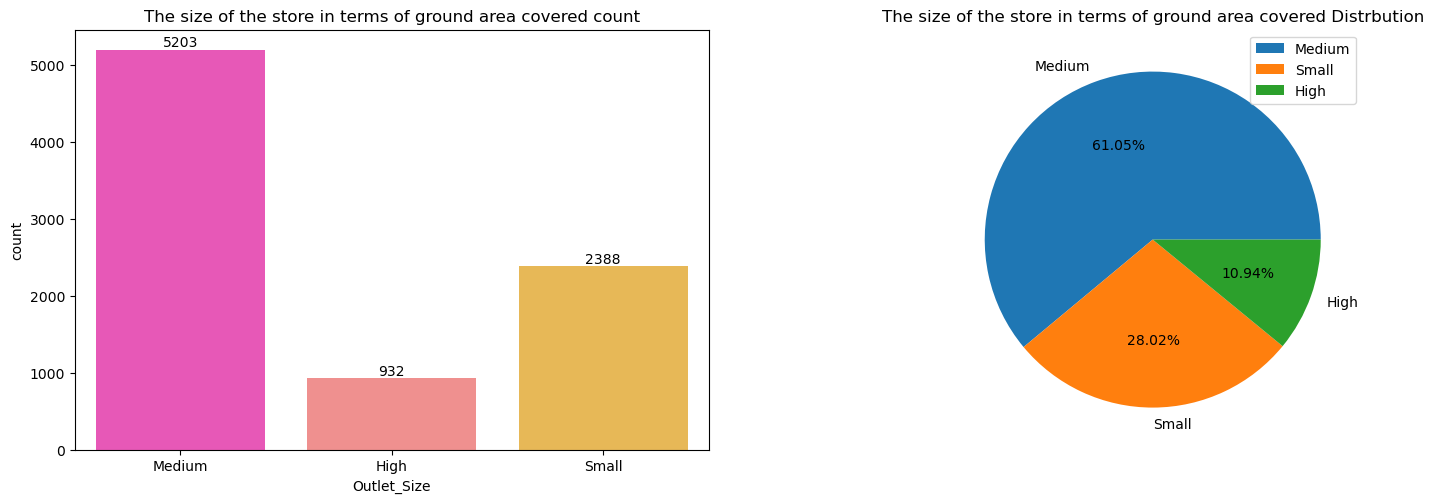

In [39]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The size of the store in terms of ground area covered count")
ax=sns.countplot(x='Outlet_Size', data=train, palette='spring')
plt.bar_label(ax.containers[0])

plt.subplot(2,2,2)
medium = train.Outlet_Size[train.Outlet_Size == 'Medium'].count()
small = train.Outlet_Size[train.Outlet_Size == 'Small'].count()
high = train.Outlet_Size[train.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%")
plt.legend()

plt.show()

major stores are of medium size

In [40]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [41]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

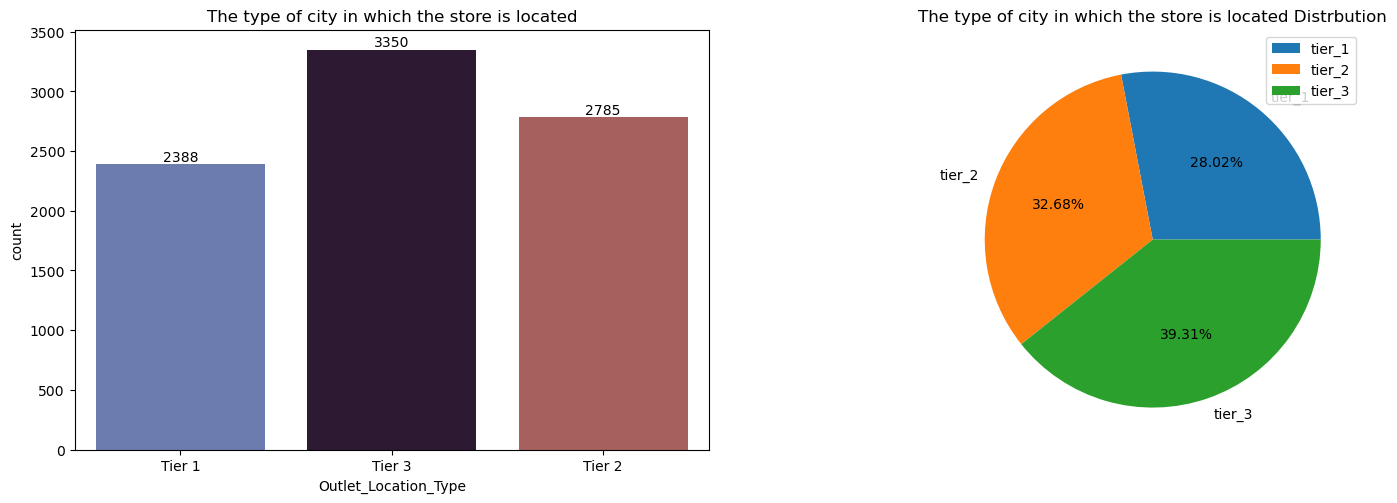

In [25]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The type of city in which the store is located")
ax=sns.countplot(x='Outlet_Location_Type', data=train, palette='twilight')
plt.bar_label(ax.containers[0])
plt.subplot(2,2,2)
tier_1 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution")
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%")

plt.legend()

plt.show()

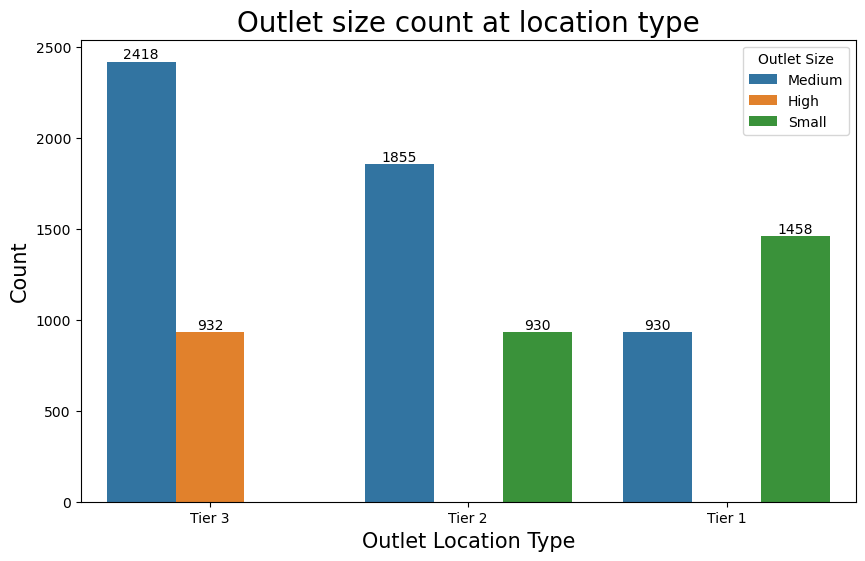

In [55]:
plt.figure(figsize=(10, 6))
plt.title("Outlet size count at location type", fontsize=20)

ax=sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data=train, order=train['Outlet_Location_Type'].value_counts().index)
for container in ax.containers:
    plt.bar_label(container)

plt.xlabel("Outlet Location Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(title='Outlet Size')
plt.show()

tier 1 and tire 2 does not have high size stores and
 in tier 3 only medium and high size store can be seen.

according to pie chart ttier 3 city has maximum no. of stores follwed by tier 2 city.

In [32]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [33]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

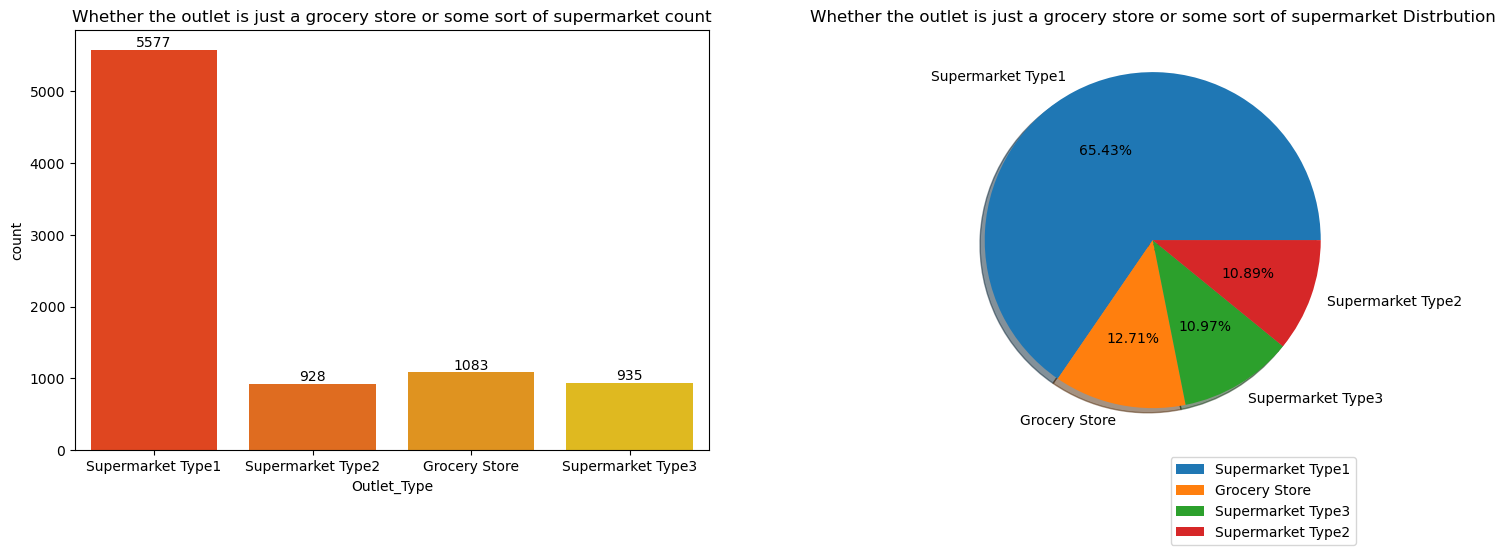

In [34]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
ax=sns.countplot(x='Outlet_Type', data=train, palette='autumn')
plt.bar_label(ax.containers[0])
plt.subplot(2,2,2)
sup_1 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type1'].count()
goc = train.Outlet_Type[train.Outlet_Type == 'Grocery Store'].count()
sup_3 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True)

plt.legend(bbox_to_anchor=(1, 0))

plt.show()

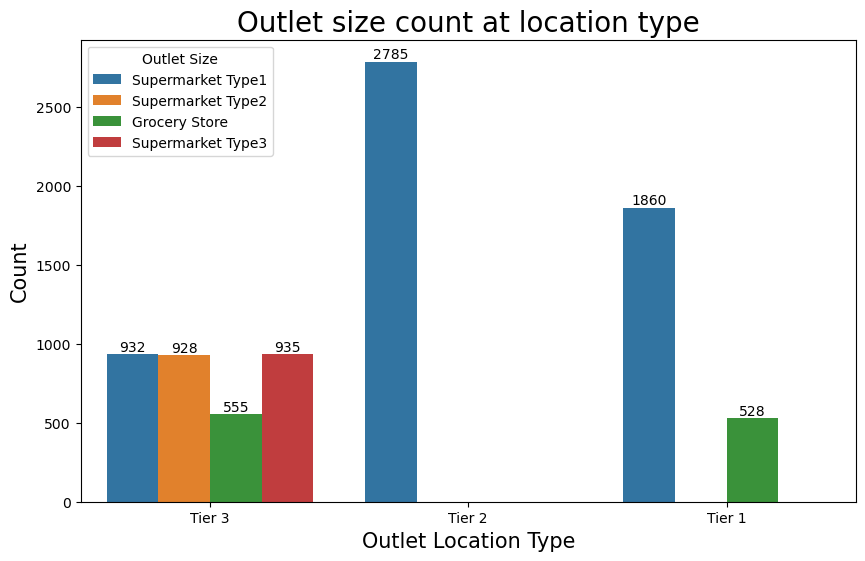

In [56]:
plt.figure(figsize=(10, 6))
plt.title("Outlet size count at location type", fontsize=20)

ax=sns.countplot(x='Outlet_Location_Type', hue='Outlet_Type', data=train, order=train['Outlet_Location_Type'].value_counts().index)
for container in ax.containers:
    plt.bar_label(container)

plt.xlabel("Outlet Location Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(title='Outlet Size')
plt.show()

in tier 2 only supermarket of type 1 is present 
in tier 3 all type of supermarket and grocery stores are present, 
 maximum stores are of supermarket type 3 follwed by supermarket of type 1
in tier1 there are only 2 types of stores with max. no. of supermarket tupe 1 followed by grocery store

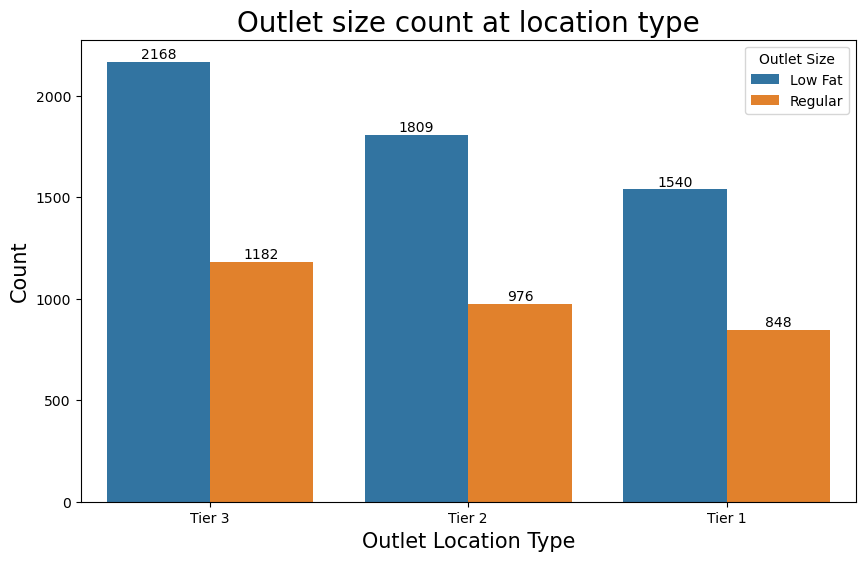

In [57]:
plt.figure(figsize=(10, 6))
plt.title("Outlet size count at location type", fontsize=20)

ax=sns.countplot(x='Outlet_Location_Type', hue='Item_Fat_Content', data=train, order=train['Outlet_Location_Type'].value_counts().index)
for container in ax.containers:
    plt.bar_label(container)

plt.xlabel("Outlet Location Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(title='Outlet Size')
plt.show()

as expected in todays time people are geting more diet concious all three location are have more count of low fat articles.
from this we can say tht more sales are coming from low fat products.

In [35]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [36]:
train['Age'] = 2021 - train.Outlet_Establishment_Year
test['Age'] = 2021 - test.Outlet_Establishment_Year

[Text(0, 0, '928'),
 Text(0, 0, '926'),
 Text(0, 0, '930'),
 Text(0, 0, '929'),
 Text(0, 0, '930'),
 Text(0, 0, '555'),
 Text(0, 0, '930'),
 Text(0, 0, '932'),
 Text(0, 0, '1463')]

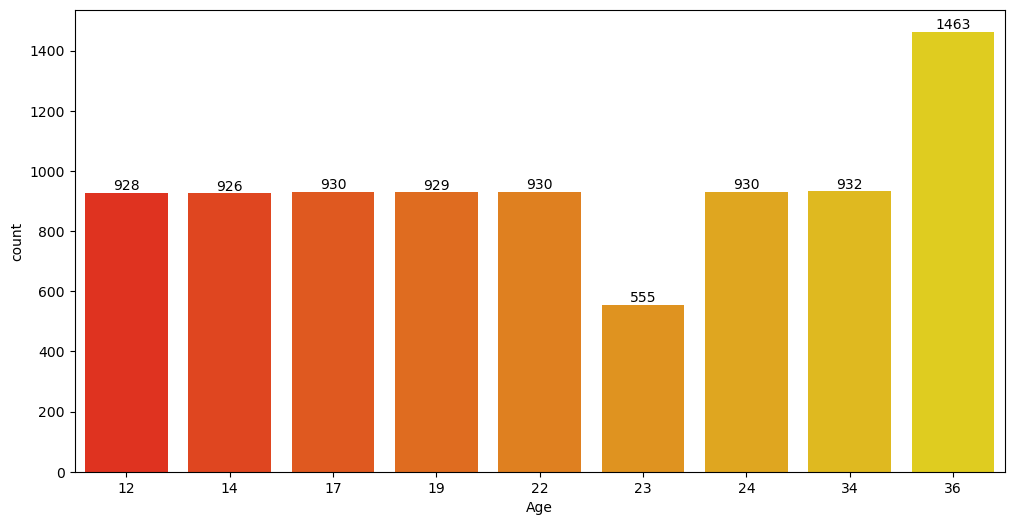

In [37]:
plt.figure(figsize=(12,6))

ax=sns.countplot(x='Age', data=train, palette='autumn');
plt.bar_label(ax.containers[0])

In [38]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
cat_features = [col for col in FEATURES if train[col].nunique() < 10]
cont_features = [col for col in FEATURES if train[col].nunique() >= 10]

In [39]:
cat_features

['Item_Fat_Content',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age']

In [40]:
cont_features

['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP']

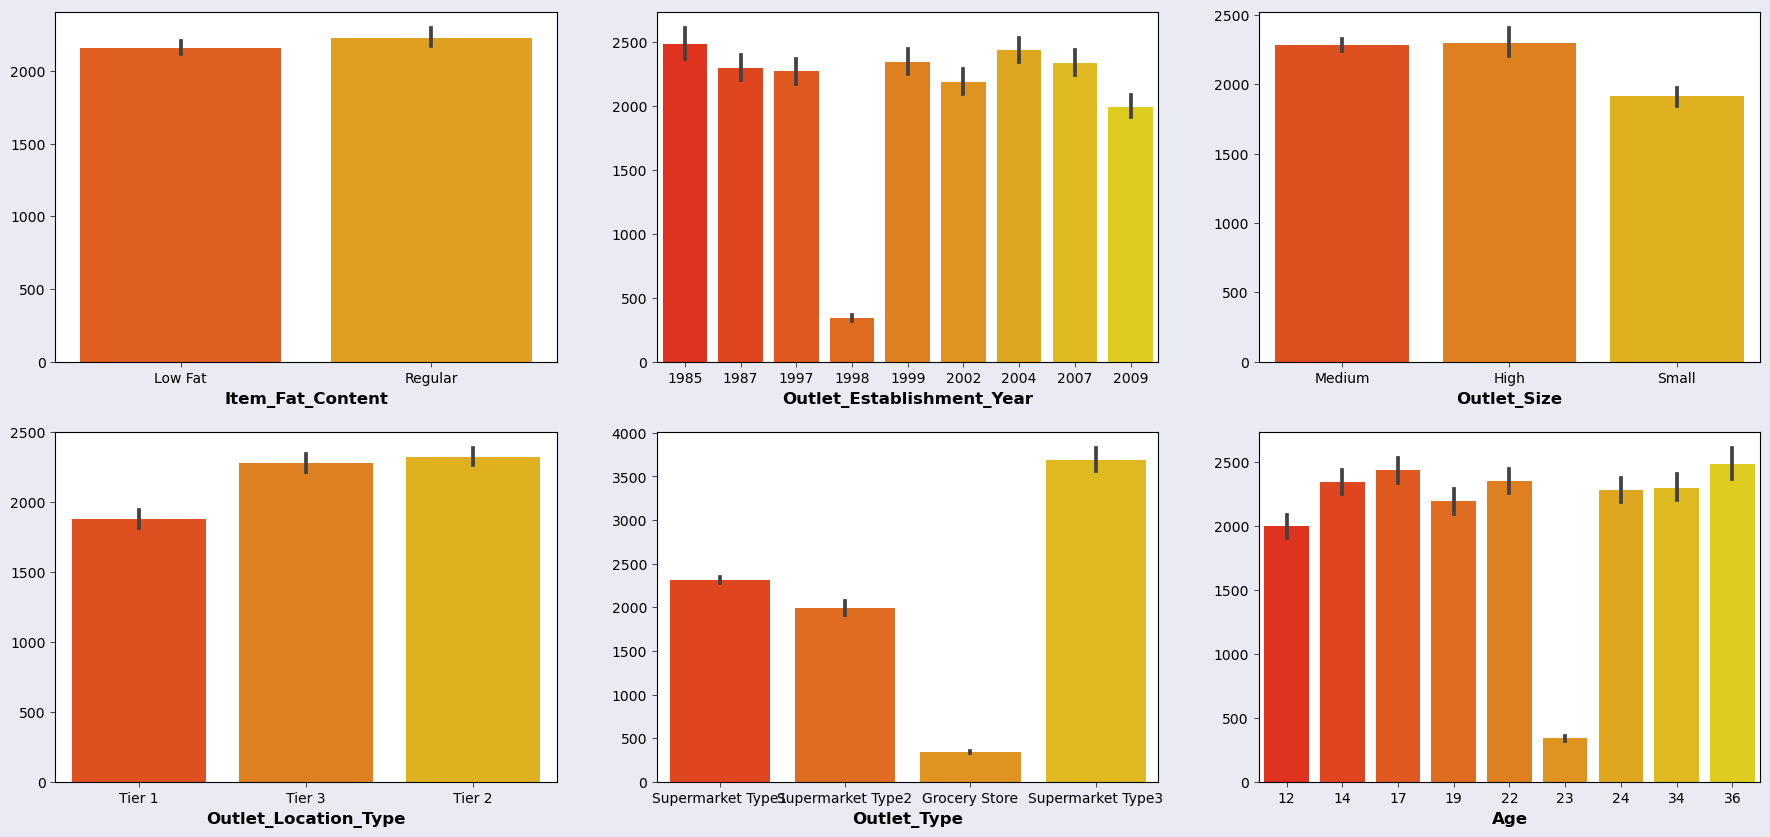

In [42]:
ncols = 3
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=train['Item_Outlet_Sales'], x=train[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

The Item Outles sales are high for both Low Fat and Regular Item types.
The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales, it is obvious because big size store can accomodate more articles and large number of inventory.
The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.
Supermarket Type3 sales tends to be high which in Grocery store is very low
It is quiet evident that Outlets established 36 years before is having good Sales margin.
We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

[Text(0, 0, '1926.14'),
 Text(0, 0, '1952.97'),
 Text(0, 0, '2006.51'),
 Text(0, 0, '2010'),
 Text(0, 0, '2111.81'),
 Text(0, 0, '2132.87'),
 Text(0, 0, '2139.22'),
 Text(0, 0, '2158.98'),
 Text(0, 0, '2204.13'),
 Text(0, 0, '2225.19'),
 Text(0, 0, '2232.54'),
 Text(0, 0, '2258.78'),
 Text(0, 0, '2277.32'),
 Text(0, 0, '2289.01'),
 Text(0, 0, '2326.07'),
 Text(0, 0, '2374.33')]

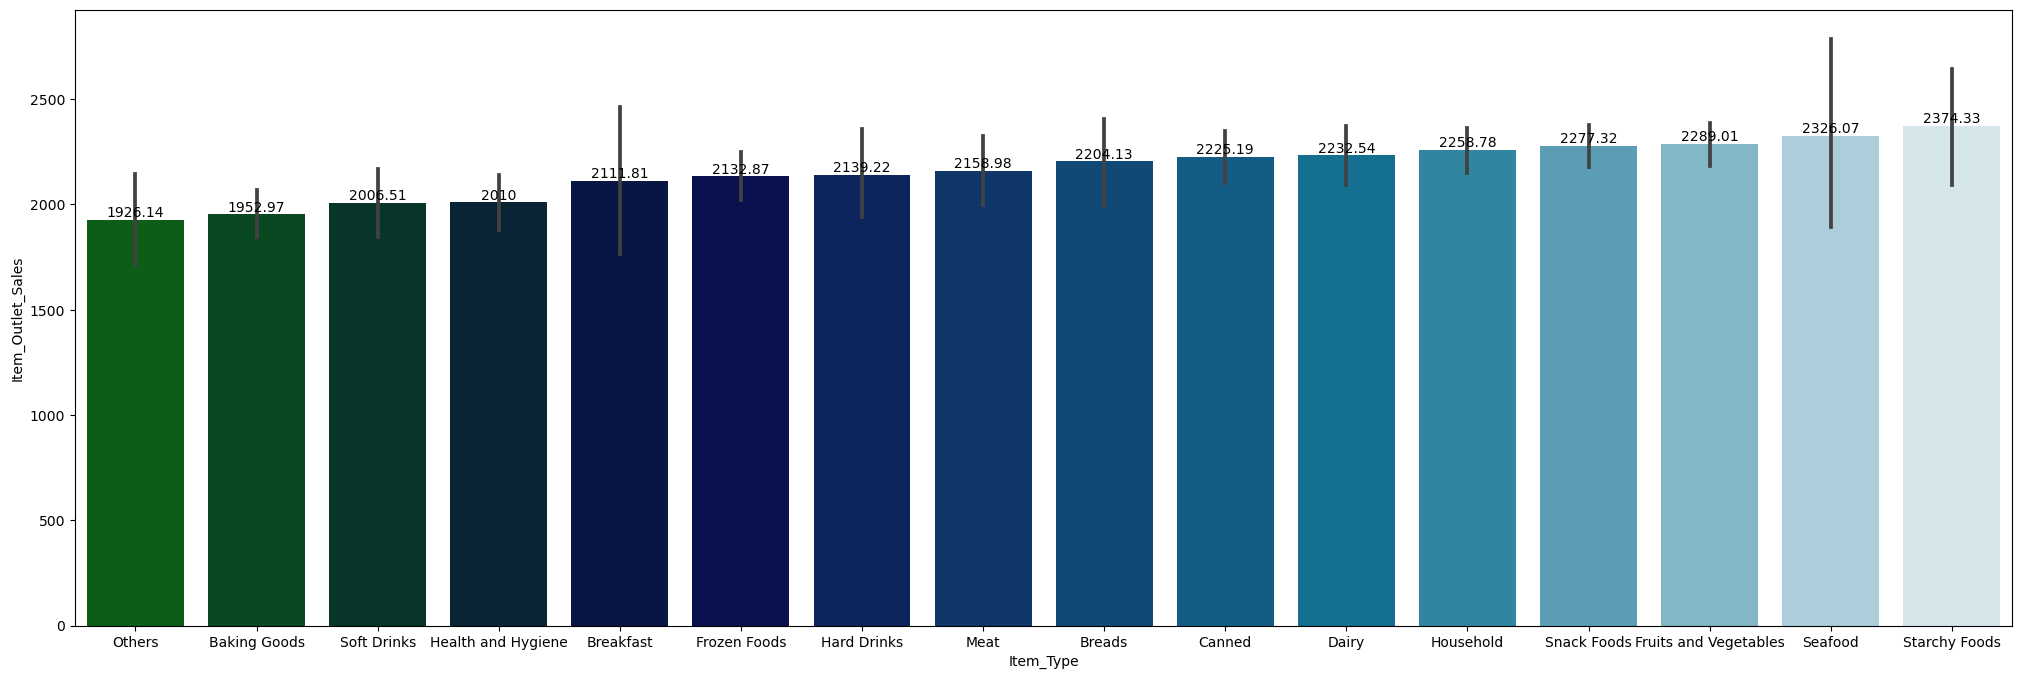

In [44]:
plt.figure(figsize=(25,8))

order=train.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales').index
ax=sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='ocean', order=order);
plt.bar_label(ax.containers[0])

starcy foods seafood and fruits and vegetables are most sold products in the stores, 
this is due to daily requirment of the food

In [62]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier']]
cat_features = [col for col in FEATURES if train[col].nunique() < 25]
cont_features = [col for col in FEATURES if train[col].nunique() >= 25]

In [86]:
cont_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Age'],
      dtype='object')

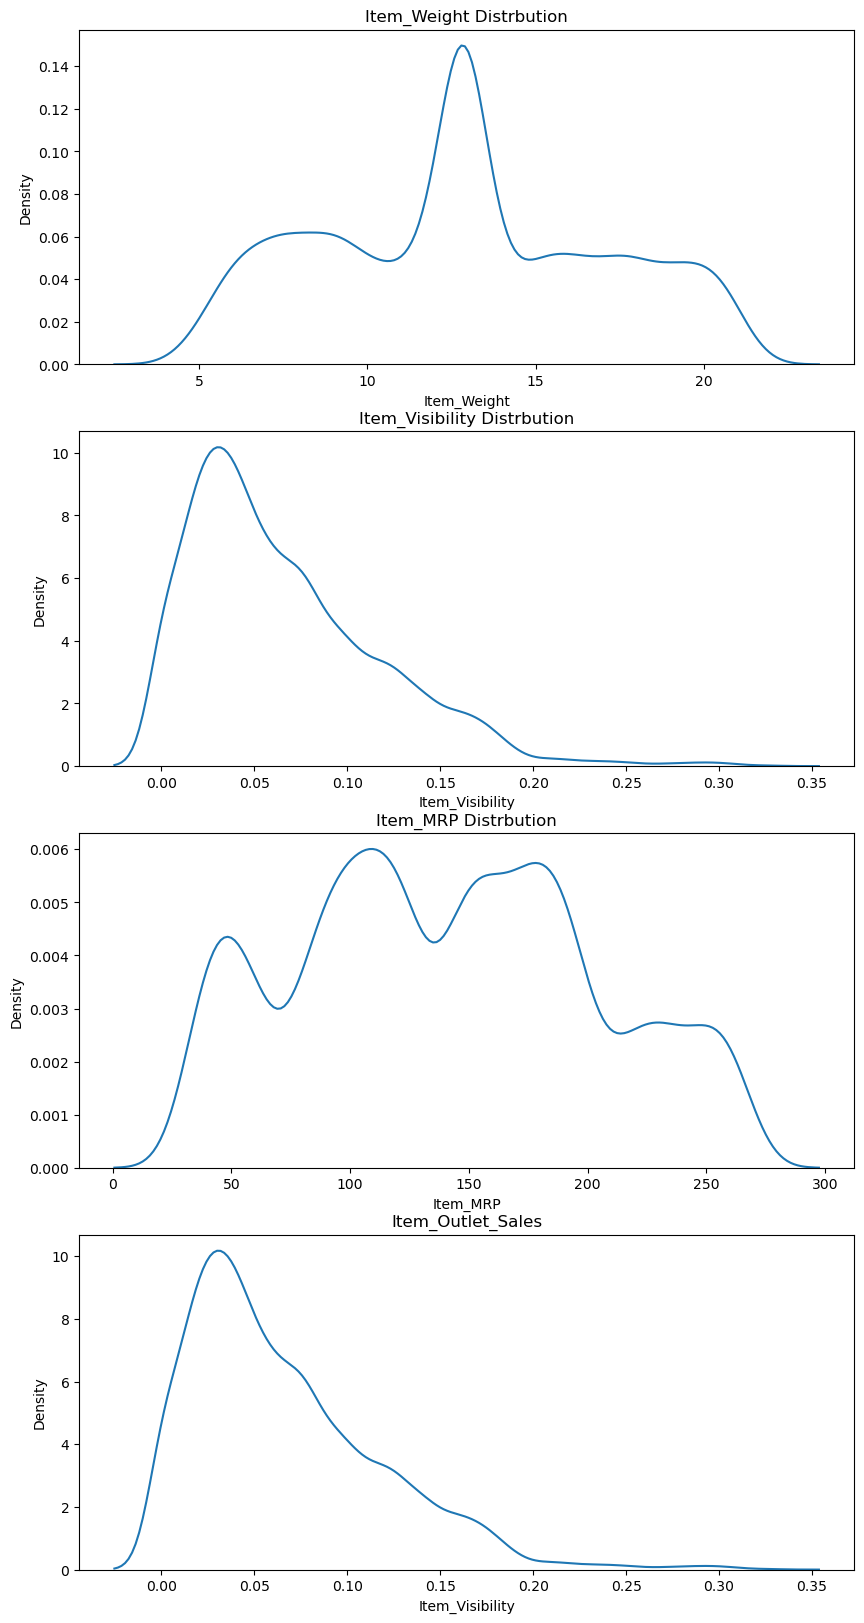

In [64]:
# distrbution of the continous features
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.title("Item_Weight Distrbution")
sns.kdeplot(x='Item_Weight', data=train)

plt.subplot(4,1,2)
plt.title("Item_Visibility Distrbution")
sns.kdeplot(x='Item_Visibility', data=train);

plt.subplot(4,1,3)
plt.title("Item_MRP Distrbution")
sns.kdeplot(x='Item_MRP', data=train);

plt.subplot(4,1,4)
plt.title("Item_Outlet_Sales")
sns.kdeplot(x='Item_Visibility', data=train);

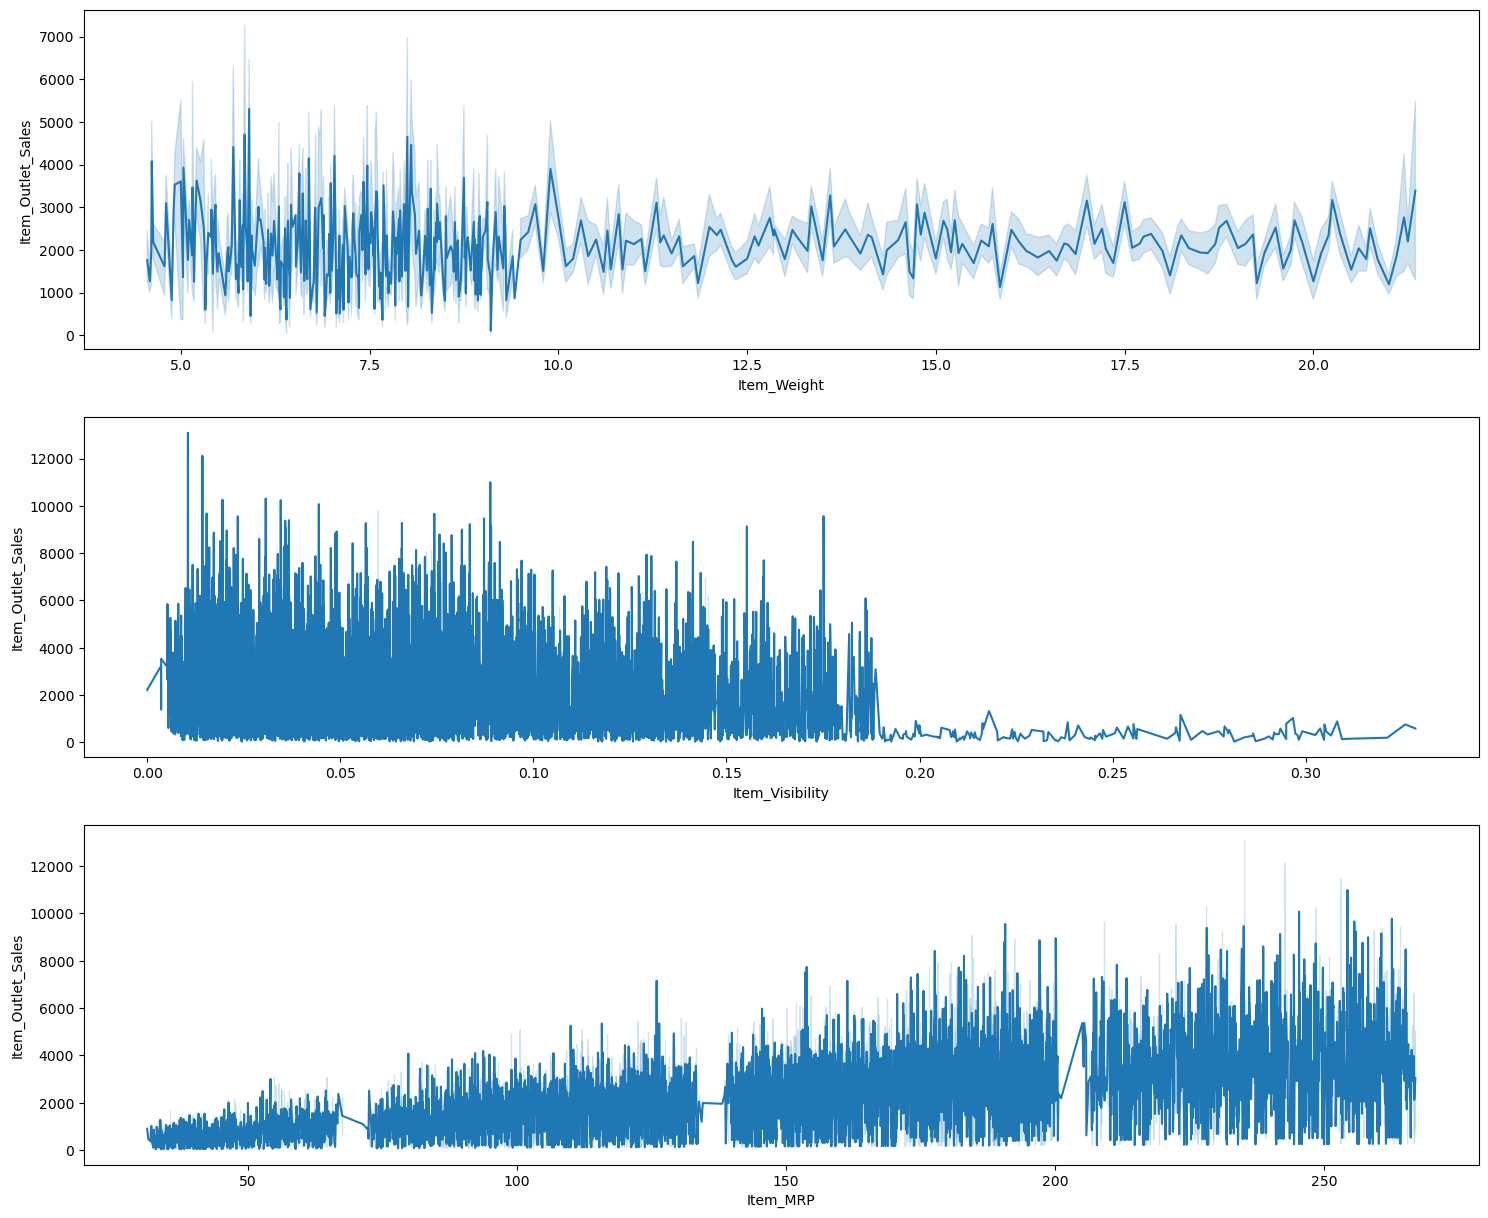

In [65]:
plt.figure(figsize=(18,15))
plt.subplot(3,1,1)
sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=train);

plt.subplot(3,1,2)
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train);

plt.subplot(3,1,3)
sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data=train);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


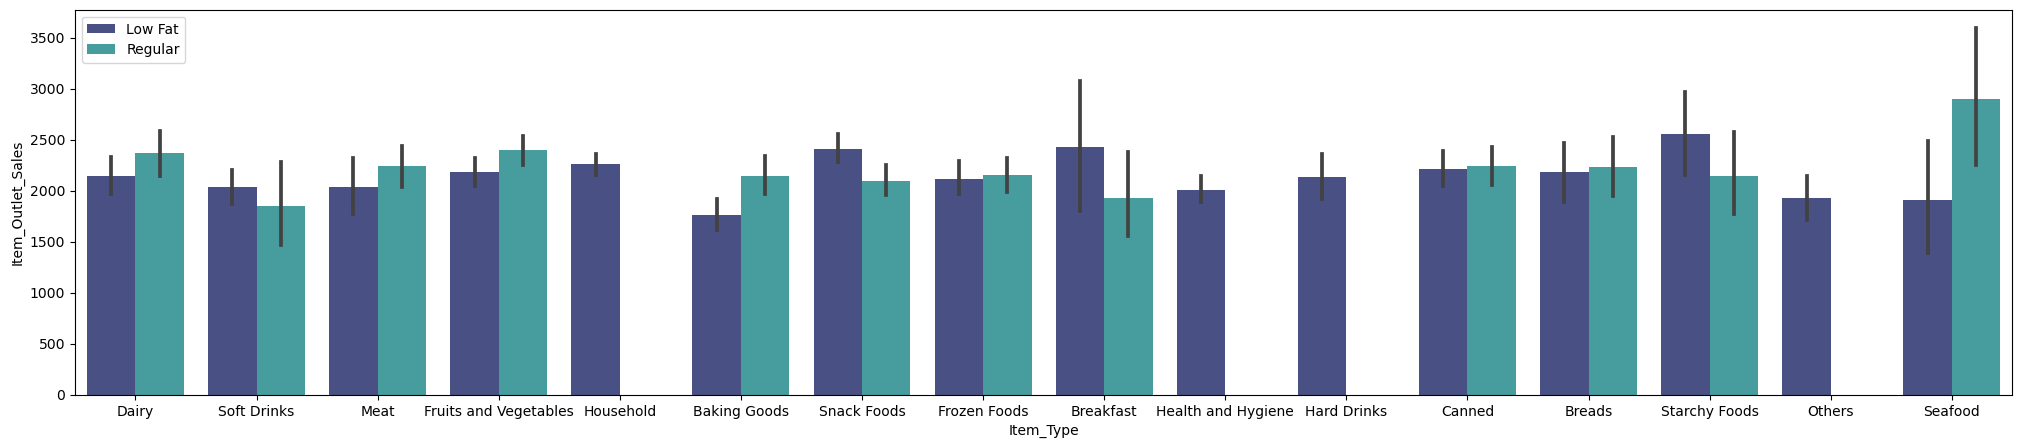

In [66]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


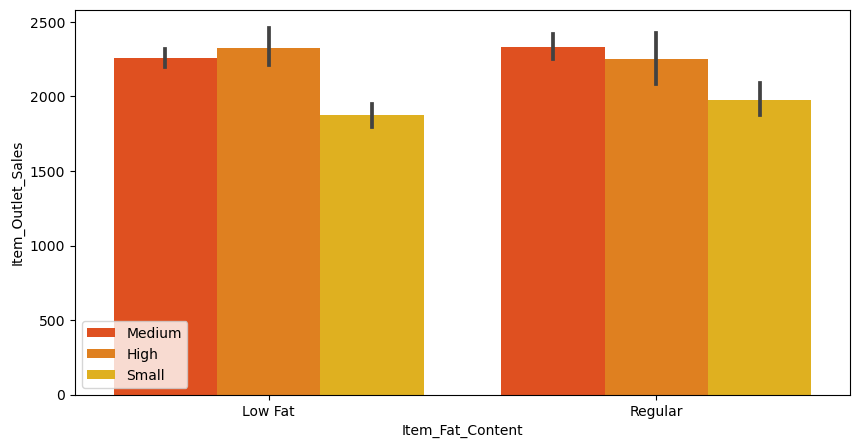

In [68]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Size',data=train,palette='autumn')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


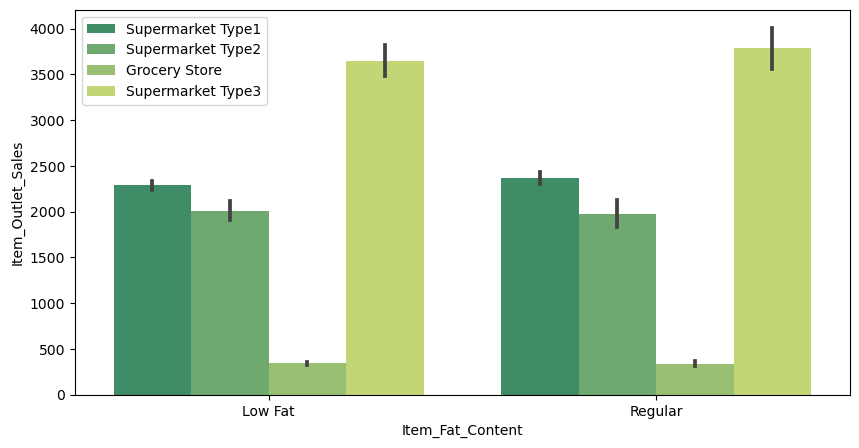

In [69]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='summer')
plt.legend()
plt.show()

# Label Encoding

In [58]:
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    train[i] = encode.fit_transform(train[i])
    
for i in list_transform:
    test[i] = encode.fit_transform(test[i])

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(4), int64(1), object(3)
memory usage: 666.0+ KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(4), int64(1), object(3)
memory usage: 399.6+ KB


droping some column as they are not addinfd much of the value to analysis 

In [61]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

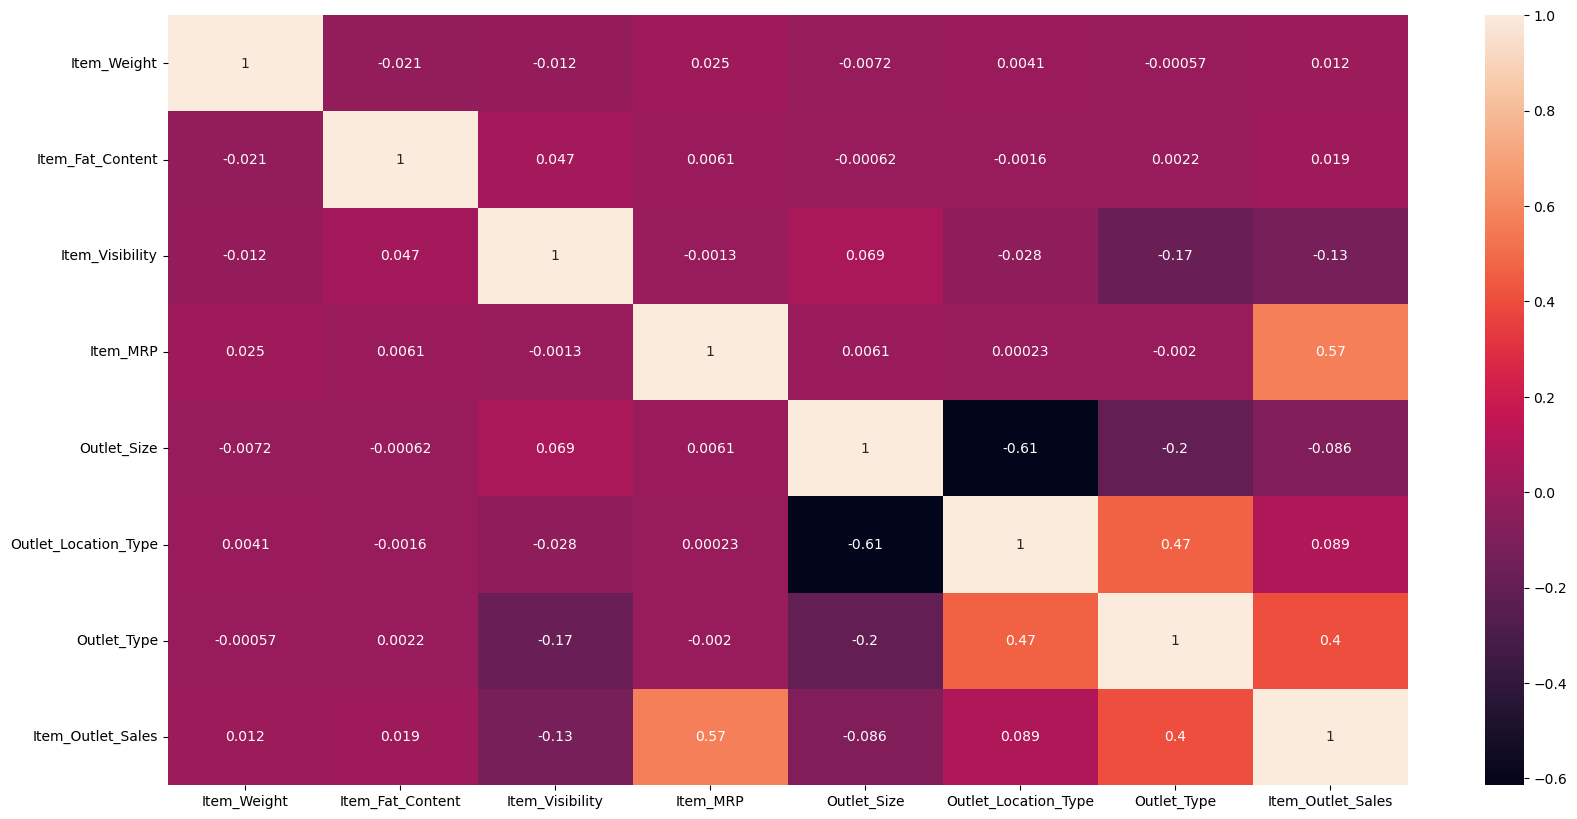

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True);

from heatmap we can see that item oulet sales depend on outlet type have positive correlation and also it have correration with item MRP
also outlet type show relation with outlet location type

In [63]:
dummies1 = pd.get_dummies(train.Item_Type)
dummies2 = pd.get_dummies(test.Item_Type)

In [64]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052


In [71]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36


In [65]:
train = pd.concat([train, dummies1], axis=1)
test = pd.concat([test, dummies2], axis=1)

In [66]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,Others,241.7538,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#drop the main feature and one dummy feature
train.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
test.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

In [69]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier']]
cat_features = [col for col in FEATURES if train[col].nunique() < 25]
cont_features = [col for col in FEATURES if train[col].nunique() >= 25]

In [70]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [71]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,0,732.3800,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,0,0.007565,107.8622,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.300000,1,0.038428,87.3198,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,1,0.118599,234.2300,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = train[cont_features]
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [74]:

test2 = test[cont_features]
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,20.750000,0.007565,107.8622
1,8.300000,0.038428,87.3198
2,14.600000,0.099575,241.7538
3,7.315000,0.015388,155.0340
4,12.695633,0.118599,234.2300


In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test2 = scaler.fit_transform(test2)

In [76]:
X = pd.DataFrame(X, columns=cont_features)
test2 = pd.DataFrame(test2, columns=cont_features)

In [77]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220


In [78]:
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.897460e+00,-1.134077,-0.536555
1,-1.035530e+00,-0.531850,-0.868937
2,4.486336e-01,0.661316,1.629848
3,-1.267578e+00,-0.981416,0.226697
4,-5.230960e-14,1.032540,1.508110


In [79]:
FEATURES

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [80]:
cat_features

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [81]:
X = pd.concat([X, train[cat_features]], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,-0.841872,-0.970732,1.747454,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,-0.908111,-1.489023,1,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.098554,-0.956917,0.010040,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.500838,-1.281758,0.660050,1,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.929428,-1.281758,-1.399220,0,0,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
y = train.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [83]:
test2 = pd.concat([test2, test[cat_features]], axis=1)
test2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,1.897460e+00,-1.134077,-0.536555,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.035530e+00,-0.531850,-0.868937,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.486336e-01,0.661316,1.629848,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.267578e+00,-0.981416,0.226697,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-5.230960e-14,1.032540,1.508110,1,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# modelling

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

In [85]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

# random forest regrossor

In [86]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 54.2753685507401%
Random Forest model score on Training data: 93.6045682366016%
Random Forest model score on Testing data: 54.90055612417968%


In [87]:
r2(rf_model, "Random Forest")

R2 Score for Random Forest is 54.90055612417968%


In [88]:
predictions = rf_model.predict(X_test)


In [89]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [90]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1319997.34
R-squared: 0.55


# linear regression

In [91]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")
train(lr, "Linear Regression")

Linear Regression score on cross validation: 50.33194952264823%
Linear Regression model score on Training data: 50.787117302862285%
Linear Regression model score on Testing data: 50.8634727017272%


# X G BOOST

In [96]:
xgboost = XGBRegressor()
kfolds(xgboost, "XGBoost")
train(xgboost, "XGBoost")

XGBoost score on cross validation: 51.905236446999126%
XGBoost model score on Training data: 85.24231558173524%
XGBoost model score on Testing data: 49.853937111838384%


# Gradient Boosting Regressor

In [98]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")

Gradient Boosting score on cross validation: 59.391484413656016%
Gradient Boosting model score on Training data: 63.445704863723094%
Gradient Boosting model score on Testing data: 59.31543599375677%


Random Forest model score on Testing data: 54.90055612417968%
Linear Regression model score on Testing data: 50.8634727017272%
XGBoost model score on Testing data: 49.853937111838384%
Gradient Boosting model score on Testing data: 59.31543599375677%

# from the above 4 model we can see that GBR model is best as score on testing data is 59.32% which higher compare to other model.

using gbr model on test.csv data set

In [100]:
gbr.score(X,y)

0.625878807487654

In [101]:
y_pred = gbr.predict(test2)

In [102]:
y_pred

array([1479.21695326, 1354.51671021,  563.06704575, ..., 1889.63713567,
       3668.2995066 , 1329.05634005])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,0,0.007565,107.8622,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.300000,1,0.038428,87.3198,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,1,0.118599,234.2300,1,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
test = pd.read_csv('C:/Users/Gilda Dhruv/Downloads/Test.csv') # read test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [105]:
test['Item_Sales_Outlet'] = y_pred

In [106]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Sales_Outlet
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1479.216953
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1354.516710
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,563.067046
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2490.469863
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6179.089391


In [107]:
test.shape

(5681, 12)

last coloum of named as item_sales_outlet is pridicted sales for the outlet.